In [37]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sfp_nsdsyn as sfp
import sfp_nsdsyn.visualization as vis
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load parameter files

In [10]:
results_dir='/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/derivatives/derivatives_HPC/results_2D'
dataset = 'nsdsyn'
stat = 'mean'
full_ver= [True]
sn_list = np.arange(1,9)
lr_rate = [0.0005]
max_epoch = [30000]
roi_list = ['V1','V2','V3']
fig_dir='/Users/jh7685/Dropbox/NYU/Projects/SF/MyResults/2D_tuning_prediction'
sn = 1

In [11]:
all_model_history = sfp.two_dimensional_model.load_history_df_subj(results_dir, dataset, stat, full_ver, [sn], lr_rate, max_epoch, 'model', roi_list)
final_params = all_model_history.query('epoch == 29999')

 ## melt final_params variable

In [41]:
params =['sigma','slope','intercept','p_1','p_2','p_3','p_4','A_1','A_2']
group = [1,2,2,3,3,3,3,3,3]
grouped_final_params = sfp.two_dimensional_model.group_params(final_params, params, group)

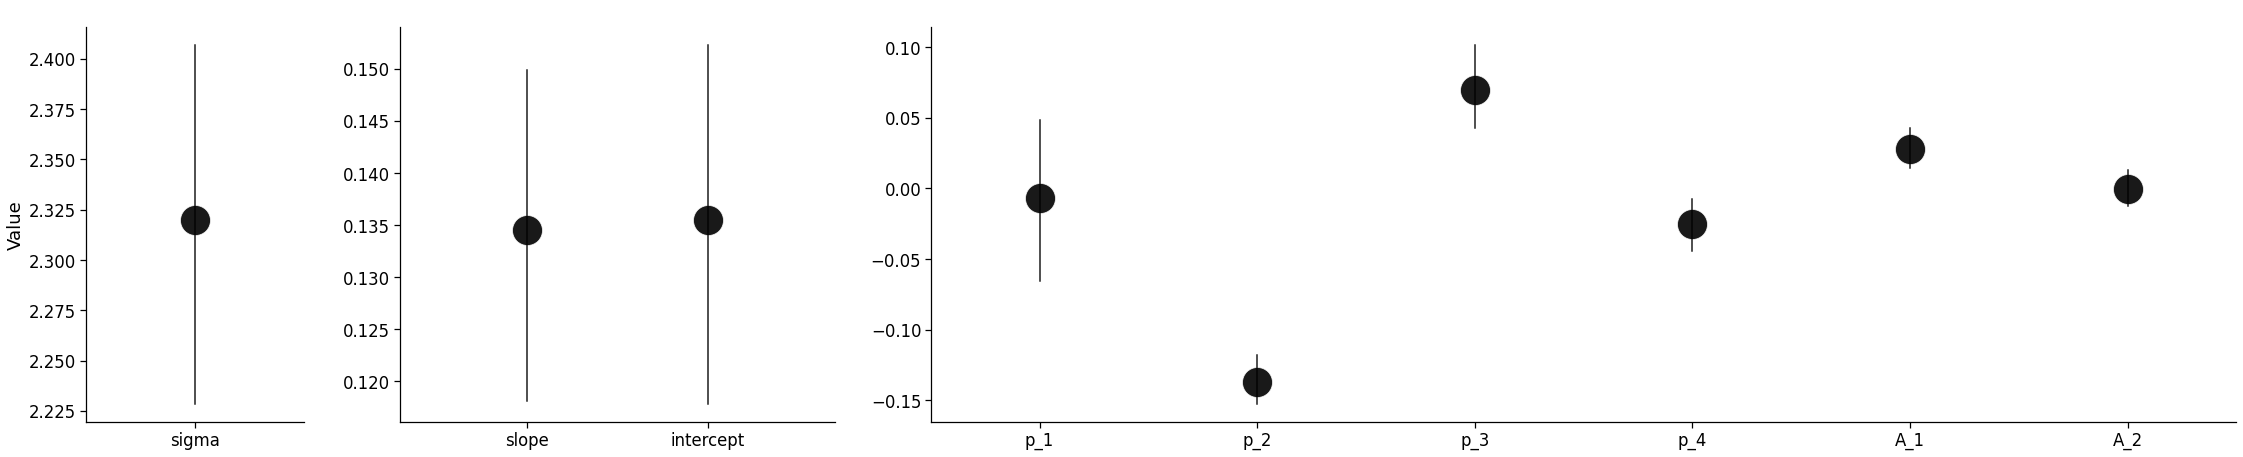

In [121]:
grid = vis.plot_2D_model_results.plot_avg_parameters(final_params, params, group)

In [112]:
axes = grid.axes
axes[0,1].get_xlim()
axes[0,1].set_xticks([0.5, 1])
axes[0,1].margins(x=0.001)

In [ ]:
grouped_final_params.query('params == "sigma"')

# Plot individual parameters
## Load all subject's data

In [26]:
all_model_history = sfp.two_dimensional_model.load_history_df_subj(results_dir, dataset, stat, full_ver, sn_list, lr_rate, max_epoch, 'model', ['V1'])
final_params = all_model_history.query('epoch == 29999')

In [32]:
test = sfp.two_dimensional_model.add_param_type_column(final_params, params)

,epoch,dset,lr_rate,max_epoch,full_ver,subj,vroinames,params,value
0,29999,nsdsyn,0.0005,30000,True,subj01,V1,sigma,2.444468
1,29999,nsdsyn,0.0005,30000,True,subj02,V1,sigma,2.019560
2,29999,nsdsyn,0.0005,30000,True,subj03,V1,sigma,2.579941
3,29999,nsdsyn,0.0005,30000,True,subj04,V1,sigma,1.975181
4,29999,nsdsyn,0.0005,30000,True,subj05,V1,sigma,2.622015
...,...,...,...,...,...,...,...,...,...
67,29999,nsdsyn,0.0005,30000,True,subj04,V1,A_2,0.028437
68,29999,nsdsyn,0.0005,30000,True,subj05,V1,A_2,0.011752
69,29999,nsdsyn,0.0005,30000,True,subj06,V1,A_2,-0.021300
70,29999,nsdsyn,0.0005,30000,True,subj07,V1,A_2,-0.029919


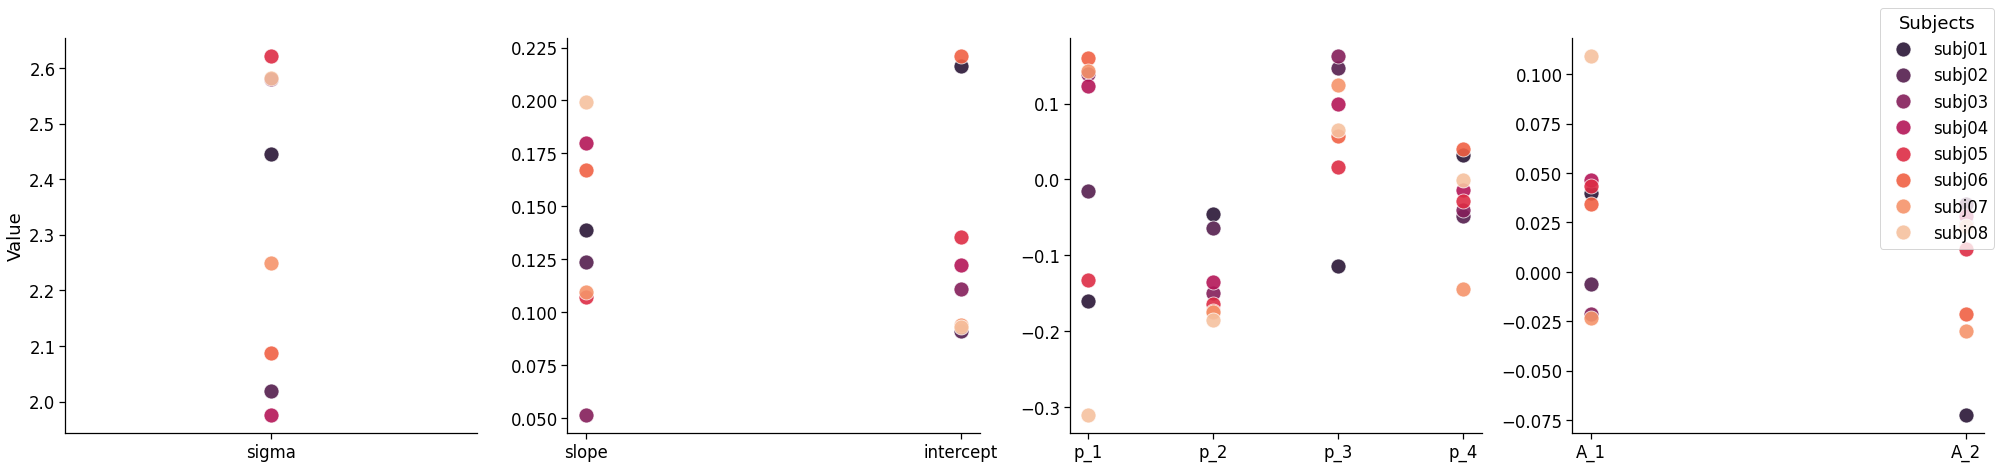

In [40]:
vis.plot_2D_model_results.plot_individual_parameters(final_params, params, group)